# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
import json
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"


In [163]:
# url =f"https://api.openweathermap.org/data/2.5/weather?lat=90&lon=180&appid={weather_api_key}&units=metric"
# url

### Generate the Cities List by Using the `citipy` Library

---

In [164]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [165]:
# # Set the API base URL
# # url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
# url =f"https://api.openweathermap.org/data/2.5/weather?lat=90&lon=180&appid={weather_api_key}&q"

url =f"https://api.openweathermap.org/data/2.5/weather?lat=90&lon=180&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 4 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 5 of Set 1 | sao joao do paraiso
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | richards bay
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | miri
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | labuhan
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | cancun
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | kuytun
Processing Record 2

Processing Record 37 of Set 4 | gushikawa
Processing Record 38 of Set 4 | maturin
Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | borovichi
Processing Record 42 of Set 4 | mwingi
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | cozumel
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | mareeba
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | faanui
Processing Record 0 of Set 5 | cockburn town
Processing Record 1 of Set 5 | lindi
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | kapaa
Processing Record 4 of Set 5 | pemba
Processing Record 5 of Set 5 | mana
Processing Record 6 of Set 5 | zhovti vody
Processing Record 7 of Set 5 | nadadores
Processing Record 8 of Set 5 | ambon
Processing Record 9 of Set 5 | ashtian
Processing Record 10 of Set 5 | clyde river
Processing Record 11 of 

Processing Record 31 of Set 8 | comodoro rivadavia
Processing Record 32 of Set 8 | shelburne
Processing Record 33 of Set 8 | lingao
Processing Record 34 of Set 8 | chau doc
Processing Record 35 of Set 8 | margate
Processing Record 36 of Set 8 | mehamn
Processing Record 37 of Set 8 | matara
Processing Record 38 of Set 8 | komono
Processing Record 39 of Set 8 | kalmunai
Processing Record 40 of Set 8 | lakatoro
Processing Record 41 of Set 8 | araouane
Processing Record 42 of Set 8 | nhulunbuy
Processing Record 43 of Set 8 | kieta
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | baker city
Processing Record 46 of Set 8 | hovd
Processing Record 47 of Set 8 | villers-les-nancy
Processing Record 48 of Set 8 | ahipara
Processing Record 49 of Set 8 | isangel
Processing Record 0 of Set 9 | kenai
Processing Record 1 of Set 9 | bandarbeyla
Processing Record 2 of Set 9 | norman wells
Processing Record 3 of Set 9 | maragogi
Processing Record 4 of Set 9 | salinopolis
Processi

Processing Record 18 of Set 12 | lolua
City not found. Skipping...
Processing Record 19 of Set 12 | omboue
Processing Record 20 of Set 12 | jiwani
Processing Record 21 of Set 12 | gazli
Processing Record 22 of Set 12 | saleaula
City not found. Skipping...
Processing Record 23 of Set 12 | rio verde de mato grosso
Processing Record 24 of Set 12 | elverum
Processing Record 25 of Set 12 | north bend
Processing Record 26 of Set 12 | kangaatsiaq
Processing Record 27 of Set 12 | nome
Processing Record 28 of Set 12 | cap malheureux
Processing Record 29 of Set 12 | walvis bay
Processing Record 30 of Set 12 | shingu
Processing Record 31 of Set 12 | ukiah
Processing Record 32 of Set 12 | vrindavan
Processing Record 33 of Set 12 | north platte
Processing Record 34 of Set 12 | basco
Processing Record 35 of Set 12 | katherine
Processing Record 36 of Set 12 | jiaozuo
Processing Record 37 of Set 12 | novouralsk
Processing Record 38 of Set 12 | henties bay
Processing Record 39 of Set 12 | huarmey
Proce

In [171]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count

city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [172]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,23.09,100,75,1.03,TO,1670261728
1,ushuaia,-54.8000,-68.3000,11.79,46,40,11.83,AR,1670261555
2,sao joao do paraiso,-15.3136,-42.0144,21.73,78,100,2.80,BR,1670261729
3,richards bay,-28.7830,32.0377,21.26,91,100,8.20,ZA,1670261729
4,bengkulu,-3.8004,102.2655,23.66,93,100,1.67,ID,1670261730


In [173]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [174]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,23.09,100,75,1.03,TO,1670261728
1,ushuaia,-54.8000,-68.3000,11.79,46,40,11.83,AR,1670261555
2,sao joao do paraiso,-15.3136,-42.0144,21.73,78,100,2.80,BR,1670261729
3,richards bay,-28.7830,32.0377,21.26,91,100,8.20,ZA,1670261729
4,bengkulu,-3.8004,102.2655,23.66,93,100,1.67,ID,1670261730


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

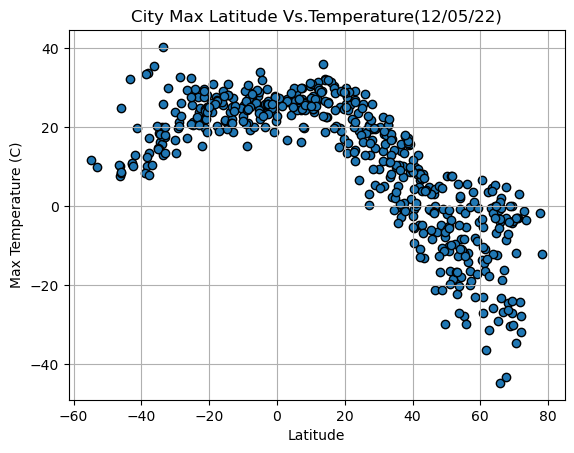

In [175]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude Vs.Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

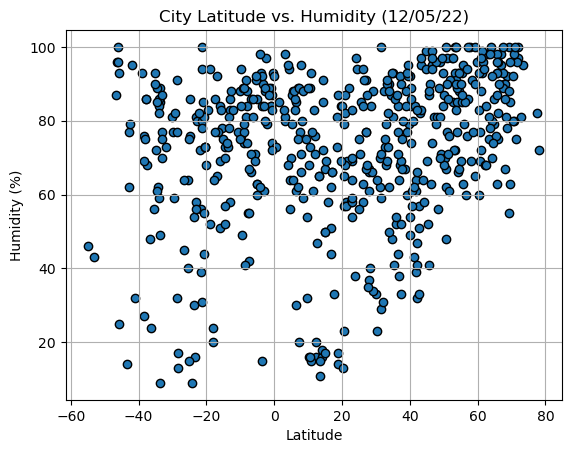

In [176]:
# Build the scatter plots for each city types
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

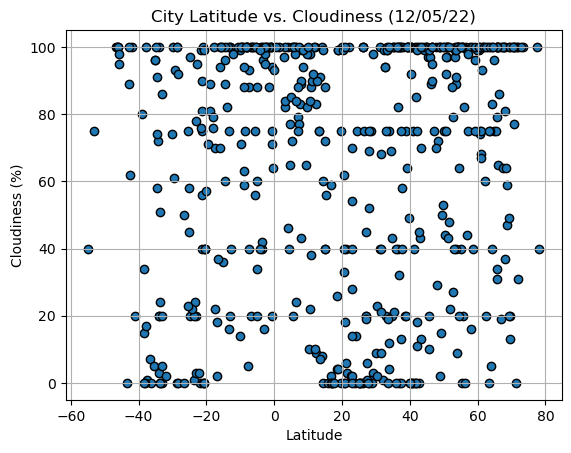

In [177]:
# Build the scatter plots for each city types
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

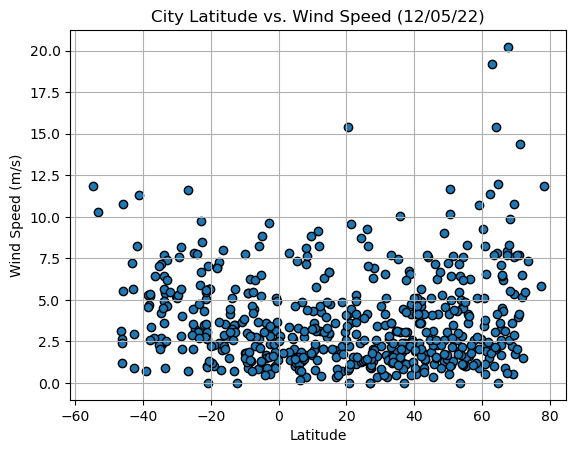

In [178]:
# Build the scatter plots for each city types
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [214]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
#     plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
#     plt.xlabel("Latitude")
#     plt.ylabel("Maximum Tempreture (C)")
#     print(f"The r-squared is: {rvalue}")
#     plt.show()
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show() 


In [215]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,miri,4.4148,114.0089,26.20,94,40,2.06,MY,1670261730
6,butaritari,3.0707,172.7902,27.13,80,82,7.80,KI,1670261731
7,tasiilaq,65.6145,-37.6368,-0.91,63,79,3.23,GL,1670261732
9,ribeira grande,38.5167,-28.7000,17.22,67,20,6.71,PT,1670261733
11,dikson,73.5069,80.5464,-3.48,95,100,7.35,RU,1670261733


In [216]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,23.09,100,75,1.03,TO,1670261728
1,ushuaia,-54.8000,-68.3000,11.79,46,40,11.83,AR,1670261555
2,sao joao do paraiso,-15.3136,-42.0144,21.73,78,100,2.80,BR,1670261729
3,richards bay,-28.7830,32.0377,21.26,91,100,8.20,ZA,1670261729
4,bengkulu,-3.8004,102.2655,23.66,93,100,1.67,ID,1670261730


###  Temperature vs. Latitude Linear Regression Plot

In [217]:
# # Linear regression on Northern Hemisphere
# x_values = northern_df ["Lat"]
# y_values = northern_df ["Max Temp"]

# regress_values = x_values * slope + intercept
# plt.plot(x_values, regress_values, "r-")
# plt.scatter(x_values,y_values)
# plt.annotate(line_eq,(1,1), fontsize=15, color="red")


# # Incorporate the other graph properties:
# plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# plt.ylabel('Max Temperature (C)')
# plt.xlabel('Latitude')
# print(f"The r-squared is: {rvalue}")
# plt.show()

The r-squared is: -0.8491272366853098


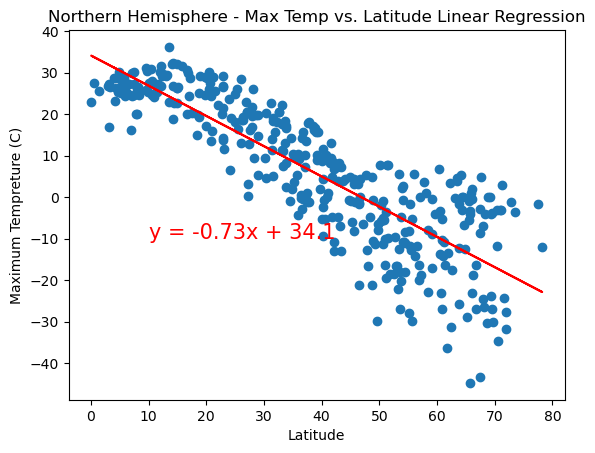

In [239]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Maximum Tempreture (C)',(10,-10))

The r-squared is: 0.5365210939679149


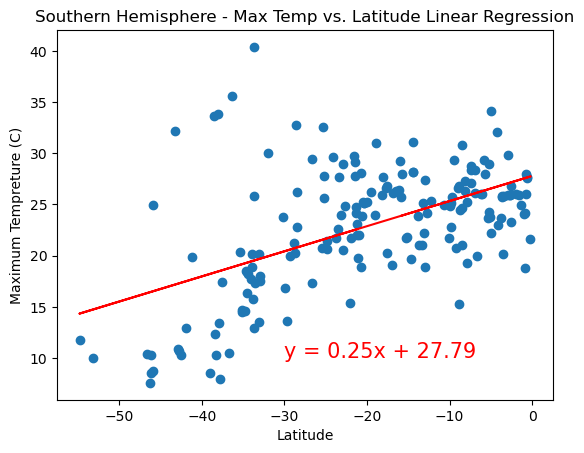

In [238]:
# Linear regression on the Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       'Maximum Tempreture (C)',(-30,10))


In [220]:
#Discussion about the linear relationship:
#point 1: as you move away from the equater the tempretures decrease on the northern hemisphere graph. 
#The higher the latitude the lower the tempretures and it shows a negative correlation. The r-squared is: -0.8647128477440108

#point 2: in the southern hemisphere the corelation is positive since the tempretures increases as you
#move away from the equater. The r-squared is: 0.6530187665194583



**Discussion about the linear relationship:

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.37815603180185575


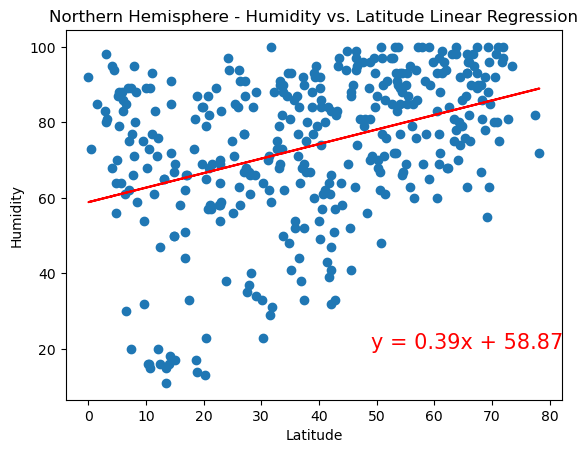

In [237]:
# Northern Hemisphere
x_values = northern_df ["Lat"]
y_values = northern_df ["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Northern Hemisphere - Humidity vs. Latitude Linear Regression',
                       'Humidity',(49,20))


The r-squared is: 0.20450058529132767


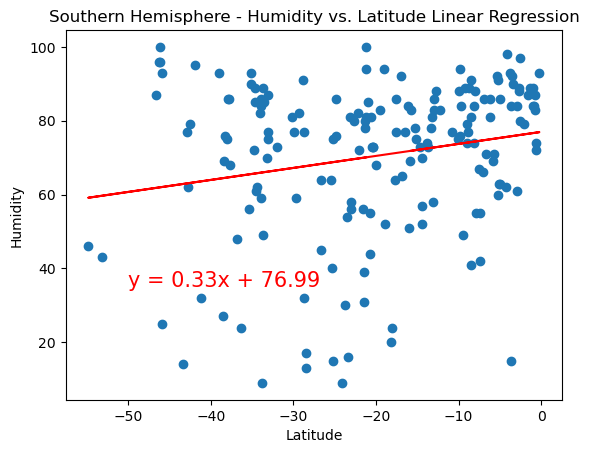

In [235]:
# Southern Hemisphere
x_values = southern_df ["Lat"]
y_values = southern_df ["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression',
                       'Humidity',(-50,35))


In [ ]:
#**Discussion about the linear relationship:** 

#There is almost no correlating between humidity levels and a city position on the Southern and Northern Hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1471057055402193


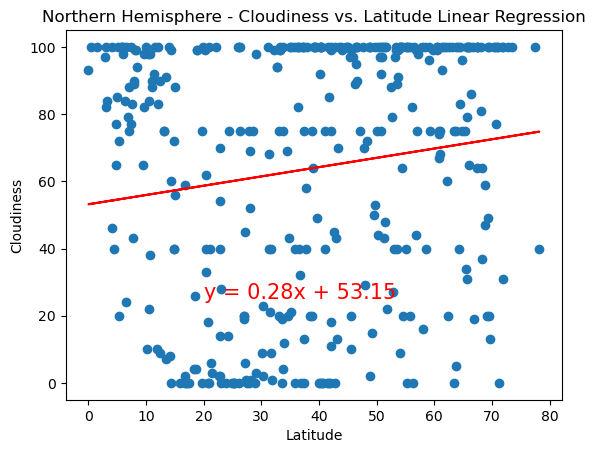

In [231]:
# Northern Hemisphere
x_values = northern_df ["Lat"]
y_values = northern_df ["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       'Cloudiness',(20,25))


The r-squared is: 0.26512649702373386


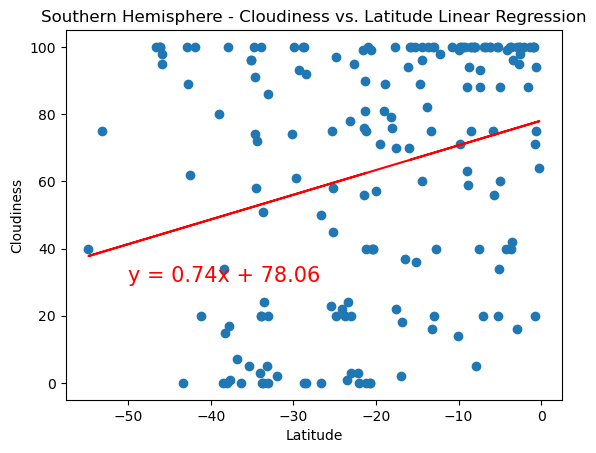

In [233]:
# Southern Hemisphere
x_values = southern_df ["Lat"]
y_values = southern_df ["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       'Cloudiness',(-50,30))

In [240]:
#Discussion about the linear relationship: 

#Cloudiness levels are widely spread across all latitudes along the whole Northern and Southern Hemispheres, therefore
#the data seems to show no relationship between cloudiness and latitude for the northern/ southern hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.2288478667862001


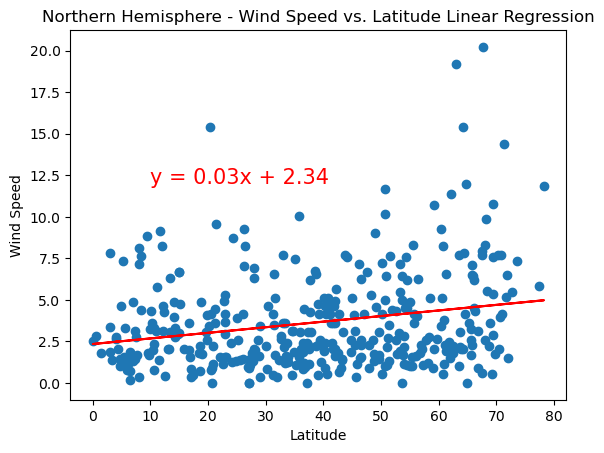

In [242]:
# Northern Hemisphere
x_values = northern_df ["Lat"]
y_values = northern_df ["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       'Wind Speed',(10,12))

The r-squared is: -0.3339717743266284


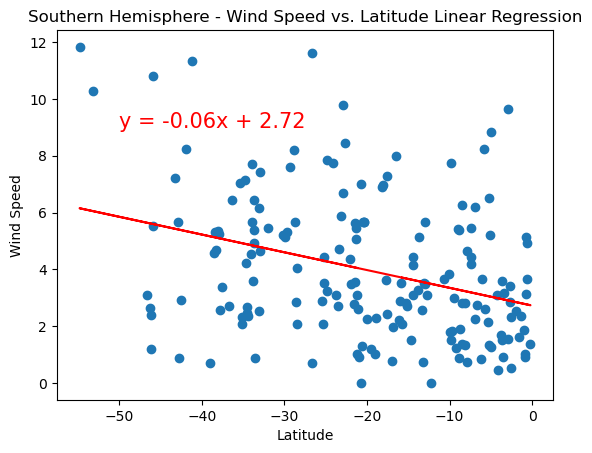

In [244]:
# Southern Hemisphere
x_values = southern_df ["Lat"]
y_values = southern_df ["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       'Wind Speed',(-50,9))

In [245]:
#Discussion about the linear relationship:

#we can see majority of the cities have higher winds between 0 to 10 m/s along the whole northern hemisphere and there
#is a low correlation between the wind speed and latitude throughout. 

#for the southern hemisphere, we can see almost a negative corelation between the wind speed and latitude
#as the wind decreases closer to the equater. 